In [1]:
!pip install -r requirements.txt

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 13551), (1000,), (500, 13551), (500,))

In [5]:
lab_df = pd.DataFrame({'label': y_train})
lab_df.value_counts(normalize=True)

label       
T_cells_CD8+    0.342
T_cells_CD4+    0.336
Cancer_cells    0.237
NK_cells        0.085
Name: proportion, dtype: float64

<Axes: >

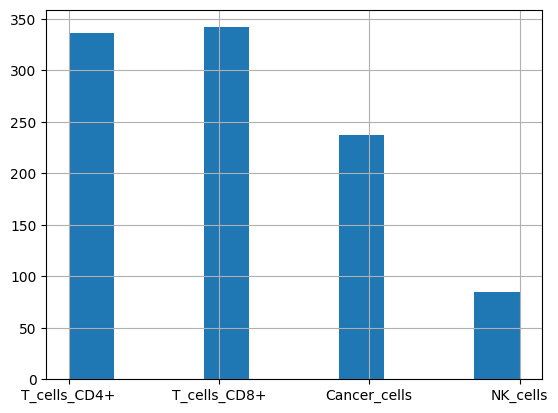

In [6]:
lab_df.label.hist()

### Oversampling

In [29]:
def resampling(X, y, method='random'):
    from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

    if method == 'random':
        ros = RandomOverSampler(random_state=42)
        X_res, y_res = ros.fit_resample(X, y)
    elif method == 'smote':
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X, y)
    elif method == 'adasyn':
        adasyn = ADASYN(random_state=42, n_neighbors=10)
        X_res, y_res = adasyn.fit_resample(X, y)
    else:
        raise ValueError("Unknown method: {}".format(method))
    return X_res, y_res

<Axes: >

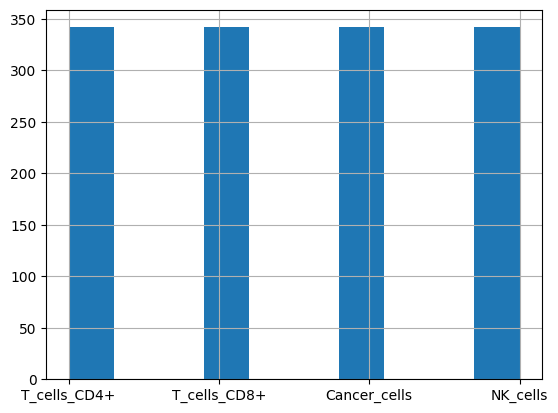

In [31]:
X_resampled, y_resampled = resampling(X_train, y_train, method='smote')
lab_df_resampled = pd.DataFrame({'label': y_resampled})
lab_df_resampled.label.hist()

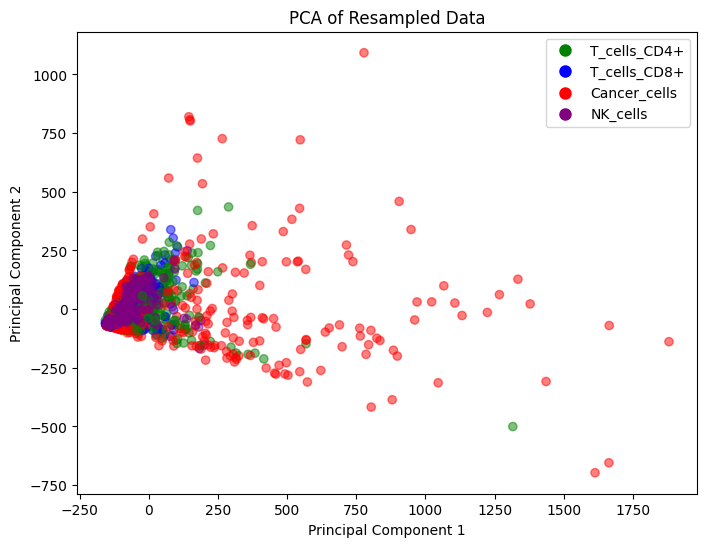

In [32]:
# Doing PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

color_map = {'T_cells_CD4+': 'green', 'T_cells_CD8+': 'blue', 'Cancer_cells': 'red', 'NK_cells': 'purple'}
# Plotting the PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=[color_map[label] for label in y_resampled], alpha=0.5)
plt.title('PCA of Resampled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in color_map.items()])
plt.show()